In [1]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
import itertools

In [2]:
#import data
train_df=pd.read_csv("train.csv")
val_df=pd.read_csv("validation.csv")
test_df=pd.read_csv("test.csv")

In [3]:
train_df.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [4]:
val_df.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


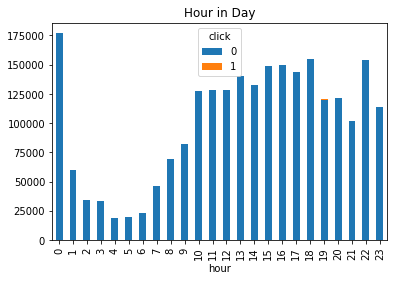

In [5]:
#train_data['hour_in_day'].nunique() ~ 0 TO 23
train_df.groupby(['hour', 'click']).size().unstack().plot(kind='bar', stacked=True, title="Hour in Day")

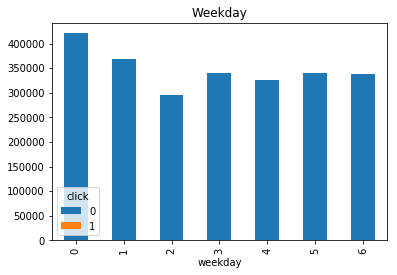

In [6]:
train_df.groupby(['weekday', 'click']).size().unstack().plot(kind='bar', stacked=True, title="Weekday")

In [7]:
print(train_df[train_df['click']==1].sum())

click                                                          1793
weekday                                                        5119
hour                                                          26070
bidid             f9178e5b1b562648a5f63d36e423b0f26cec812d42c756...
userid            ca22bf856b6c720994a95302f5ce71e0d6d5d4169ed92c...
useragent         windows_iewindows_ieandroid_safariandroid_safa...
IP                114.93.5.*116.5.161.*117.136.24.*119.22.194.*1...
region                                                       264333
city                                                         272620
adexchange                                                     3204
urlid                                                             0
slotid            News_F_Width1mm_35273380_3491320_11404023mm_10...
slotwidth                                                    996247
slotheight                                                   314055
slotvisibility    001FirstView112211001SecondVie

In [8]:
train_df[['hour','click']].groupby(['hour']).sum().sort_values('click',ascending=False)

,click
hour,
18,156
17,146
22,138
16,124
0,122
19,119
13,114
23,102
15,92


In [9]:
train_df[['weekday','click']].groupby(['weekday']).sum().sort_values('click',ascending=False)

,click
weekday,
2,286
3,283
0,271
4,264
1,249
5,247
6,193


In [10]:
train_df.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange          49829
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag            497479
dtype: int64

In [11]:
def MissingValues(df):
    
    """
    Function to detect null values
    """
    
    obj_cols = list(df.select_dtypes(include=['object']).columns)
    nulls_list = [df[col].str.match("null").sum()*100/df.shape[0] for col in obj_cols]
    nulls_df = pd.DataFrame(index = obj_cols, columns = ["Nulls_Percentage"], data = nulls_list)
    
    return nulls_df

def ImputeMissingValues(df):
    
    """
    As will be seen, the only column that has null values and will be actually used as a feature
    in our models is "adexchange". All other columns with null values (i.e. domain, url, urlid, keypage)
    will be ignored because they have too many values to be encoded (feature space would be enormous)
    """
    
    ### Remember to impute slot_format and slot_visibility!!!
    
    #df.loc[ df["adexchange"] == "null", "adexchange"] = df["adexchange"].dropna().mode()[0]
    df["adexchange"] = df["adexchange"].fillna(df["adexchange"].dropna().mode()[0])
    
    return df

In [12]:
minBid=np.min(train_df["payprice"].values)
maxBid=np.max(train_df["payprice"].values)
randRange= np.arange(minBid+1, maxBid+5,step_size) 

NameError: name 'step_size' is not defined

In [19]:
train_df = ImputeMissingValues(train_df)
val_df = ImputeMissingValues(val_df)

In [20]:
train_df.isnull().sum()

click                    0
weekday                  0
hour                     0
bidid                    0
userid                   0
useragent                0
IP                       0
region                   0
city                     0
adexchange               0
domain              137135
url                  86812
urlid              2430981
slotid                   0
slotwidth                0
slotheight               0
slotvisibility           0
slotformat               0
slotprice                0
creative                 0
bidprice                 0
payprice                 0
keypage             504990
advertiser               0
usertag                  0
weekday_cat              0
hour_cat                 0
region_cat               0
city_cat                 0
adexchange_cat           0
advertiser_cat           0
os                       0
browser                  0
slotarea                 0
time_of_the_day          0
slotprice_cat            0
dtype: int64

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Data columns (total 36 columns):
click              int64
weekday            int64
hour               int64
bidid              object
userid             object
useragent          object
IP                 object
region             int64
city               int64
adexchange         float64
domain             object
url                object
urlid              float64
slotid             object
slotwidth          int64
slotheight         int64
slotvisibility     object
slotformat         object
slotprice          int64
creative           object
bidprice           int64
payprice           int64
keypage            object
advertiser         int64
usertag            object
weekday_cat        object
hour_cat           object
region_cat         object
city_cat           object
adexchange_cat     object
advertiser_cat     object
os                 object
browser            object
slotarea           int64
time_of_the_d

In [22]:
#Since estimating usertag is time-consuming

In [23]:
def UsertagCategories(df):
    
    # Drop nan
    df = df["usertag"].dropna().reset_index(drop = True)
    
    # Find unique usertags
    usertags_list = [df[i].split(",") for i in range(df.shape[0])]
    
    # itertools.chain.from_iterable joins a list of lists into a single list
    usertags = np.unique(list(itertools.chain.from_iterable(usertags_list)))
    
    # Remove the empty string ""
    usertags = [tag for tag in usertags if len(tag) > 0]
    
    return usertags

In [24]:
ut_t=UsertagCategories(train_df)
ut_v=UsertagCategories(val_df)

In [25]:

def FeatureEngineering(df):
    
        # Convert numerical to categorical
        df["weekday_cat"] = df["weekday"].map(lambda x: str(x))
        df["hour_cat"] = df["hour"].map(lambda x: str(x))
        df["region_cat"] = df["region"].map(lambda x: str(x))
        df["city_cat"] = df["city"].map(lambda x: str(x))
        df["adexchange_cat"] = df["adexchange"].map(lambda x: str(x))
        df["advertiser_cat"] = df["advertiser"].map(lambda x: str(x))
        
        # Operating system
        df["os"] = df["useragent"].map(lambda x: x.split("_")[0])
        
        # Browser
        df["browser"] = df["useragent"].map(lambda x: x.split("_")[1])
        
        # Slotarea
        df["slotarea"] = df["slotwidth"]*df["slotheight"]   ####.astype("category")
        
        # time of the day
        df["time_of_the_day"] = ""
        
        df.loc[(df["weekday"] == 0) & (df["hour"] > 0) & (df["hour"] <=8), "time_of_the_day"] = "Sunday_Night"
        df.loc[(df["weekday"] == 0) & (df["hour"] > 8) & (df["hour"] < 17), "time_of_the_day"] = "Sunday_Morning"
        df.loc[(df["weekday"] == 0) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "time_of_the_day"] = "Sunday_Evening"
        
        df.loc[(df["weekday"] == 1) & (df["hour"] > 0) & (df["hour"] <=8), "time_of_the_day"] = "Monday_Night"
        df.loc[(df["weekday"] == 1) & (df["hour"] > 8) & (df["hour"] < 17), "time_of_the_day"] = "Monday_Morning"
        df.loc[(df["weekday"] == 1) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "time_of_the_day"] = "Monday_Evening"

        
        df.loc[(df["weekday"] == 2) & (df["hour"] > 0) & (df["hour"] <=8), "time_of_the_day"] = "Tuesday_Night"
        df.loc[(df["weekday"] == 2) & (df["hour"] > 8) & (df["hour"] < 17), "time_of_the_day"] = "Tuesday_Morning"
        df.loc[(df["weekday"] == 2) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "time_of_the_day"] = "Tuesday_Evening"

        df.loc[(df["weekday"] == 3) & (df["hour"] > 0) & (df["hour"] <=8), "time_of_the_day"] = "Wednesday_Night"
        df.loc[(df["weekday"] == 3) & (df["hour"] > 8) & (df["hour"] < 17), "time_of_the_day"] = "Wednesday_Morning"
        df.loc[(df["weekday"] == 3) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "time_of_the_day"] = "Wednesday_Evening"

        df.loc[(df["weekday"] == 4) & (df["hour"] > 0) & (df["hour"] <=8), "time_of_the_day"] = "Tuesday_Night"
        df.loc[(df["weekday"] == 4) & (df["hour"] > 8) & (df["hour"] < 17), "time_of_the_day"] = "Tuesday_Morning"
        df.loc[(df["weekday"] == 4) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "time_of_the_day"] = "Tuesday_Evening"

        df.loc[(df["weekday"] == 5) & (df["hour"] > 0) & (df["hour"] <=8), "time_of_the_day"] = "Friday_Night"
        df.loc[(df["weekday"] == 5) & (df["hour"] > 8) & (df["hour"] < 17), "time_of_the_day"] = "Friday_Morning"
        df.loc[(df["weekday"] == 5) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "time_of_the_day"] = "Friday_Evening"

        
        df.loc[(df["weekday"] == 6) & (df["hour"] > 0) & (df["hour"] <=8), "time_of_the_day"] = "Saturday_Night"
        df.loc[(df["weekday"] == 6) & (df["hour"] > 8) & (df["hour"] < 17), "time_of_the_day"] = "Saturday_Morning"
        df.loc[(df["weekday"] == 6) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "time_of_the_day"] = "Saturday_Evening"
        
        # Slotprice binning
        df["slotprice_cat"] = 0
        
        df.loc[ df["slotprice"] <= 10, "slotprice_cat"] = 0
        df.loc[ (df["slotprice"] > 10) & (df["slotprice"] <= 50), "slotprice_cat"] = 1
        df.loc[ (df["slotprice"] > 50) & (df["slotprice"] <= 100), "slotprice_cat"] = 2
        df.loc[ df["slotprice"] > 100, "slotprice_cat"] = 3

        
#         # Usertags
#         for tag in ut_t:
#             col_name = "usertag_" + tag
#             df[col_name] = df["usertag"].map(lambda x: 1 if tag in x.split(",") else 0)
        
  
        return df


def DropColumns(df):
    
    columns = ["weekday", "hour", "bidid", "userid", "useragent", "IP", "domain", "url", "urlid", "slotid",
               "slotwidth", "slotheight", "slotprice", "keypage", "usertag", "region", "city", "adexchange", "advertiser"]
    df.drop(columns, axis = 1, inplace = True)
    
    return df


def GetDummies(df):
    
    df = pd.get_dummies(df)
    return df

In [26]:
train_df = FeatureEngineering(train_df)
val_df  = FeatureEngineering(val_df)

In [27]:
train_df = DropColumns(train_df)
val_df  = DropColumns(val_df)

In [28]:
train_df = GetDummies(train_df)
val_df  = GetDummies(val_df)

In [32]:
train_df.describe()

,click,bidprice,payprice,slotarea,slotprice_cat,usertag_10006,usertag_10024,usertag_10031,usertag_10048,usertag_10052,...,time_of_the_day_Saturday_Night,time_of_the_day_Sunday_Evening,time_of_the_day_Sunday_Morning,time_of_the_day_Sunday_Night,time_of_the_day_Tuesday_Evening,time_of_the_day_Tuesday_Morning,time_of_the_day_Tuesday_Night,time_of_the_day_Wednesday_Evening,time_of_the_day_Wednesday_Morning,time_of_the_day_Wednesday_Night
count,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,...,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06
mean,7.375623e-04,2.729620e+02,7.815142e+01,7.699868e+04,6.687432e-01,5.648242e-01,2.210268e-01,1.833297e-01,5.875612e-02,1.385552e-01,...,1.969082e-02,9.446639e-02,6.104038e-02,1.765584e-02,1.086964e-01,1.150893e-01,3.226558e-02,7.514580e-02,5.217523e-02,1.238677e-02
std,2.714809e-02,2.891153e+01,5.984636e+01,1.726495e+04,8.826637e-01,4.957801e-01,4.149386e-01,3.869367e-01,2.351677e-01,3.454818e-01,...,1.389356e-01,2.924765e-01,2.394044e-01,1.316971e-01,3.112580e-01,3.191298e-01,1.767046e-01,2.636265e-01,2.223803e-01,1.106044e-01
min,0.000000e+00,2.270000e+02,0.000000e+00,1.404000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.410000e+02,3.300000e+01,6.552000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.940000e+02,6.800000e+01,7.500000e+04,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,3.000000e+02,9.900000e+01,9.000000e+04,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,3.000000e+02,3.000000e+02,1.800000e+05,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [34]:
minBid=np.min(val_df["payprice"].values)
print("Min Bid is:",minBid)
maxBid=np.max(val_df["payprice"].values)
print("Max Bid is:",maxBid)

Min Bid is: 0
Max Bid is: 300


In [ ]:
#Create a customized range for random bidding:
custRange=np.arange(minBid+1, maxBid+2,10)

In [35]:
results_df=pd.DataFrame(columns=['Clicks', 'Click-Through Rate',  'Spend', 'Average CPM', 'Average CPC'])

In [36]:
print(custRange)

[  1  11  21  31  41  51  61  71  81  91 101 111 121 131 141 151 161 171
 181 191 201 211 221 231 241 251 261 271 281 291 301]


In [38]:
custRangeLen=custRange.shape[0]
CTRArray2D=np.empty([custRangeL, custRangeL])
ImpressionsArray2D=np.empty([custRangeLen, custRangeLen])
ClicksArray2D=np.empty([custRangeLen, custRangeLen])
SpendArray2D=np.empty([custRangeLen, custRangeLen])
CostPerClickArray2D=np.empty([custRangeLen, custRangeLen])
CostPerMilleArray2D=np.empty([custRangeLen, custRangeLen])

In [39]:
for minimumBid in custRange:
    y=custRangeL-1
    for maximumBid in custRange: #maxBid>minBid?????
        if maximumBid>minimumBid:
            val_df['OurBid']=randint(minimumBid, maximumBid+1)
            impWon = (validation_df["payprice"]<val_df["OurBid"])
            impressions = validation_df[impWon].shape[0]
            clicks = np.sum(validation_df[impWon]["click"].values)
            spend = np.sum(validation_df[impWon]["payprice"].values)
            CostPerClick = spend/clicks
            CostPerMille = spend*1000/(impressions)
            ClickThroughRate=(clicks*100)/impressions
        
        else:
            impressions = minImp*0.90
            clicks = minClicks*0.90
            spend = minSpend*0.90
            CostPerClick = minCPC*0.90
            CostPerMille = minCPM*0.90
            ClickThroughRate = minCTR*0.90
        

        CTRArray2D[y][x]=ClickThroughRate
        ImpressionsArray2D[y][x]=int(impressions)
        ClicksArray2D[y][x]=clicks
        SpendArray2D[y][x]=spend
        CostPerClickArray2D[y][x]=CostPerClick
        CostPerMilleArray2D[y][x]=CostPerMille
        #print("Max Bid=",maximumBid,"Min Bid=",minimumBid)
        #print("x=",x,"y=",y)
        y-=1
    x+=1

NameError: name 'minImp' is not defined

In [16]:
train_split = np.array_split(train_df, 1)
print(train_split)


[         click  weekday  hour                                     bidid  \
0            0        5    22  b7bea80521fdecd95d2d761a38c91c3f09618066   
1            0        1    20  4f51205475678f5a124bc76b2c54163bf8eaa7eb   
2            0        3    13  b604e3fd054a658ab7ced4285ebf2ef54d2bd890   
3            0        6    23  0348beeae93e561584c3b50fc9e7746a33048ad7   
4            0        5     6  268149c1789bce2bc9798ffd97ec431219bafeb3   
5            0        4    17  1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0   
6            0        3    12  6b4f23dd215a5f11136c2f29214236cfee1f0122   
7            0        3    16  f7c1d8ea177211249456c79e194617ce107bc077   
8            0        5    14  9e97694096fe8692851048a893231a7f7ff87922   
9            0        5     0  d1b7c7fdb88ce3aa78a540bb29848dd77329a574   
10           0        6    16  14be67cc32f1a108f7a2737205146708d41a9edf   
11           0        1    18  699d636b4456c7ec1dceca3943b0fec735a88336   
12           0        2 

In [31]:
budget = 6250
clicks = 0
impressions = 0

for i in range(0,len(val_df)):
    if budget > 0 and budget>val_df['payprice'][i]/1000: 
        if 300 > val_df['bidprice'][i]:
            clicks += val_df['click'][i]
            impressions += 1 
            budget -= val_df['payprice'][i]/1000
    else:
        print('Budget over')
        break

print("Clicks: " + str(clicks))
print("Impressions: " + str(impressions))


Budget over
Clicks: 48
Impressions: 76242


In [33]:

CTR = (clicks/impressions) * 100
eCPC = (6250-budget)/clicks
CPM = ((6250-budget)/impressions) * 1000

print(CTR)
print(eCPC)
print(CPM)

0.06295742504131581
130.20564583335081
81.97412187509298


In [134]:
budget=6250*1000
print("Our Budget is:",budget, "Fen")
print("To use over",test_df.shape[0],"bid opportunities.")
BudPerBid=budget/test_df.shape[0]
print("Budget / Bid Opportunity:",BudPerBid)

minBid=np.min(train_df["payprice"].values)
maxBid=np.max(train_df["payprice"].values)

step_size = 1
custRange = np.arange(minBid+1, maxBid+5,step_size) # determines the range that bids should be in
#custRange = np.arange(60, 65,1)

minCustRange = np.arange(21, 91, step_size) # determines the range that bids should be in
maxCustRange = np.arange(71, 161, step_size) # determines the range that bids should be in

Our Budget is: 6250000 Fen
To use over 303375 bid opportunities.
Budget / Bid Opportunity: 20.601565718994642


In [144]:
def BuildCTRMatrix(dataframe,plot,repeats):
    #lastInRange = custRange[len(custRange)-1:][0]+1
    for n in range(0,repeats,1):
        dataSubset = dataframe.sample(frac=0.5, replace=False)
        print(n+1,"/",repeats,"...")
        
        for minimumBid in minCustRange:
            print('counting clicks',minimumBid,datetime.datetime.now().time())        
            for maximumBid in maxCustRange: #maxBid>minBid?????
                if maximumBid>minimumBid:
                    Clicks = EvalRandBidClicksOnly(dataSubset,minimumBid, maximumBid,6250000,val_df.shape[0])
                    CTRMatrix[minimumBid][maximumBid]=(CTRMatrix[minimumBid][maximumBid]*n+Clicks)/(n+1)
        CTRMatrix.to_csv("RandomBidResults.csv")
    return CTRMatrix

In [145]:
def ExtractBestBounds(ResultsMatrix):
    print("Best CTR is:",ResultsMatrix.values.max())
    for x in minCustRange:
        for y in maxCustRange:
            if ResultsMatrix[x][y]==ResultsMatrix.values.max():
                print("X:",x,"Y:",y)
                lowerBound=x
                upperBound=y
    return lowerBound, upperBound

In [146]:
def EvalRandBid(dataframe,lowerBound, upperBound):
    dataframe['RandBid'] = np.random.randint(lowerBound, upperBound+1, dataframe.shape[0])
    impsWon = (dataframe["payprice"]<dataframe['RandBid'])
    impressions = dataframe[trueValues].shape[0]
    clicks = np.sum(dataframe['impsWon']["click"].values)
    ClickThroughRate=(clicks*100)/impressions
    return ClickThroughRate

In [147]:
def EvalRandBid(dataframe,lowerBound, upperBound,budget,size):
    
    tempData=dataframe
    #tempData['RandBid']=constant
    tempData['RandBid'] = np.random.randint(lowerBound, upperBound+1, dataframe.shape[0])

    tempData['impWon'] = np.where(tempData["payprice"]<tempData['RandBid'],1,0)
    tempData['ModelPays'] = tempData['impWon']*tempData['payprice']
    tempData['cumsum'] = tempData['ModelPays'].cumsum()
    lastRowToInclude = np.argmax(tempData['cumsum'].as_matrix()>AdjustedBudget)
    if lastRowToInclude==0:
        lastRowToInclude=tempData.shape[0]
    #print("lastRowToInclude",lastRowToInclude)
    
    shortData = tempData.head(lastRowToInclude).copy(True)
    impWon = (0<shortData['ModelPays'])
    impressions = shortData[impWon].shape[0]
    clicks = np.sum(shortData[impWon]["click"].values)
    spend = np.sum(shortData[impWon]["payprice"].values)
    CostPerClick = spend/clicks
    CostPerMille = spend*1000/(impressions)
    ClickThroughRate=(clicks*100)/impressions
    #print(constant, ClickThroughRate, clicks, spend, CostPerMille, CostPerClick, impressions)
    return [ClickThroughRate, clicks, spend, CostPerMille, CostPerClick, impressions]
    #return clicks


    #impressions = shortData.loc[shortData['ModelPays'] > 0].sum()
    #clicks = shortData.loc[shortData['ModelPays'] > 0 , 'click'].sum()
    #print("clicks:",clicks)

In [94]:
zero_data = np.zeros(shape=(len(custRange),len(custRange)))
zero_data[zero_data < 1] = 0.0
CTRMatrix=pd.DataFrame(zero_data,index=reversed(custRange), columns=custRange)

In [ ]:

CTRMatrix =  BuildCTRMatrix(val_df,plot=True,repeats=5)
#

1 / 5 ...
counting clicks 21 16:11:15.114450


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


counting clicks 22 16:11:29.350533
counting clicks 23 16:11:41.154248
counting clicks 24 16:11:53.613604
counting clicks 25 16:12:06.685976
counting clicks 26 16:12:18.898164
counting clicks 27 16:12:30.126923
counting clicks 28 16:12:41.844786
counting clicks 29 16:12:55.407257
counting clicks 30 16:13:07.816541
counting clicks 31 16:13:19.749369
counting clicks 32 16:13:34.144924
counting clicks 33 16:13:47.304717
counting clicks 34 16:14:00.483732
counting clicks 35 16:14:13.264501
counting clicks 36 16:14:25.719112
counting clicks 37 16:14:38.198202
counting clicks 38 16:14:49.894727
counting clicks 39 16:15:02.872955
counting clicks 40 16:15:15.188573
counting clicks 41 16:15:27.042987
counting clicks 42 16:15:39.597746
counting clicks 43 16:15:52.422178
counting clicks 44 16:16:04.633325
counting clicks 45 16:16:17.425452
counting clicks 46 16:16:29.981254
counting clicks 47 16:16:42.648966
counting clicks 48 16:16:58.592141
counting clicks 49 16:17:19.780119
counting clicks 50 1

In [153]:
print(CTRMatrix)

     1    2    3    4    5    6    7    8    9    10  ...   295  296  297  \
304  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
303  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
302  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
301  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
300  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
299  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
298  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
297  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
296  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
295  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
294  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
293  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

In [150]:
print(CTRMatrix)

     1    2    3    4    5    6    7    8    9    10  ...   295  296  297  \
304  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
303  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
302  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
301  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
300  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
299  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
298  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
297  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
296  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
295  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
294  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
293  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

In [91]:
print(AdjustedBudget)

0.12899999916134158


In [119]:
minBid=np.min(val_df["payprice"].values)
print("Min Bid is:",minBid)
maxBid=np.max(val_df["payprice"].values)
print("Max Bid is:",maxBid)
custRange=x =np.arange(minBid+1, maxBid+2,10) 

Min Bid is: 0
Max Bid is: 300


In [105]:
print(custRange)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [102]:
resultsDF = pd.DataFrame(columns=['Strategy','CTR', 'Clicks', 'Spend', 'CPM', 'CPC'])

In [103]:
custRangeL=custRange.shape[0]
CTRArray2D=np.empty([custRangeL, custRangeL])
ImpressionsArray2D=np.empty([custRangeL, custRangeL])
ClicksArray2D=np.empty([custRangeL, custRangeL])
SpendArray2D=np.empty([custRangeL, custRangeL])
CostPerClickArray2D=np.empty([custRangeL, custRangeL])
CostPerMilleArray2D=np.empty([custRangeL, custRangeL])

In [104]:
print(custRangeL)

301


In [108]:
CTRArray=[]
ImpressionsArray=[]
ClicksArray=[]
SpendArray=[]
CostPerClickArray=[]
CostPerMilleArray=[]

In [111]:
for ConstantBid in custRange:
    val_df['OurBid']=ConstantBid
    trueValues = (val_df["payprice"]<val_df["OurBid"])
    impressions = val_df[trueValues].shape[0]
    clicks = np.sum(val_df[trueValues]["click"].values)
    spend = np.sum(val_df[trueValues]["payprice"].values)
    CostPerClick = spend/clicks
    CostPerMille = spend*1000/(impressions)
    ClickThroughRate=(clicks*100)/impressions
    
    CTRArray.append(ClickThroughRate)
    ImpressionsArray.append(impressions)
    ClicksArray.append(clicks)
    SpendArray.append(spend)
    CostPerClickArray.append(CostPerClick)
    CostPerMilleArray.append(CostPerMille)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  import sys


In [133]:
minCTR=np.min(CTRArray)
minImp=np.min(ImpressionsArray)
minClicks=np.min(ClicksArray)
minSpend=np.min(SpendArray)
minCPC=np.min(CostPerClickArray)
minCPM=np.min(CostPerMilleArray)

In [116]:
from random import randint

In [140]:
def EvalRandBidClicksOnly(dataframe,lowerBound, upperBound,budget,size):
    
    AdjustedBudget=(budget/size)*dataframe.shape[0]
    #print("AdjustedBudget is:",AdjustedBudget)
    tempData=dataframe
    #tempData['ConstBid']=constant
    tempData['ConstBid'] = np.random.randint(lowerBound, upperBound+1, dataframe.shape[0])

    tempData['trueValues'] = np.where(tempData["payprice"]<tempData['ConstBid'],1,0)
    tempData['ModelPays'] = tempData['trueValues']*tempData['payprice']
    tempData['cumsum'] = tempData['ModelPays'].cumsum()
    lastRowToInclude = np.argmax(tempData['cumsum'].as_matrix()>AdjustedBudget)
    if lastRowToInclude==0:
        lastRowToInclude=tempData.shape[0]
    #print("lastRowToInclude",lastRowToInclude)
    
    shortData = tempData.head(lastRowToInclude)
    trueValues = (0<shortData['ModelPays'])
    ##impressions = shortData[trueValues].shape[0]
    clicks = np.sum(shortData[trueValues]["click"].values)
    ##spend = np.sum(shortData[trueValues]["payprice"].values)
    ##CostPerClick = spend/clicks
    ##CostPerMille = spend*1000/(impressions)
    ##ClickThroughRate=(clicks*100)/impressions
    #print(constant, ClickThroughRate, clicks, spend, CostPerMille, CostPerClick, impressions)
    #return [ClickThroughRate, clicks, spend, CostPerMille, CostPerClick, impressions]
    return clicks

In [ ]:
def EvalRandBid(dataframe,lowerBound, upperBound,budget,size):
    
    AdjustedBudget=(budget/size)*dataframe.shape[0]
    #print("AdjustedBudget is:",AdjustedBudget)
    tempData=dataframe
    #tempData['ConstBid']=constant
    tempData['ConstBid'] = np.random.randint(lowerBound, upperBound+1, dataframe.shape[0])

    tempData['trueValues'] = np.where(tempData["payprice"]<tempData['ConstBid'],1,0)
    tempData['ModelPays'] = tempData['trueValues']*tempData['payprice']
    tempData['cumsum'] = tempData['ModelPays'].cumsum()
    lastRowToInclude = np.argmax(tempData['cumsum'].as_matrix()>AdjustedBudget)
    if lastRowToInclude==0:
        lastRowToInclude=tempData.shape[0]
    #print("lastRowToInclude",lastRowToInclude)
    
    shortData = tempData.head(lastRowToInclude).copy(True)
    trueValues = (0<shortData['ModelPays'])
    impressions = shortData[trueValues].shape[0]
    clicks = np.sum(shortData[trueValues]["click"].values)
    spend = np.sum(shortData[trueValues]["payprice"].values)
    CostPerClick = spend/clicks
    CostPerMille = spend*1000/(impressions)
    ClickThroughRate=(clicks*100)/impressions
    #print(constant, ClickThroughRate, clicks, spend, CostPerMille, CostPerClick, impressions)
    return [ClickThroughRate, clicks, spend, CostPerMille, CostPerClick, impressions]
    #return clicks

In [120]:
#print(custRange)
x=0
for minimumBid in custRange:
    y=custRangeL-1
    for maximumBid in custRange: #maxBid>minBid?????
        if maximumBid>minimumBid:
            val_df['OurBid']=randint(minimumBid, maximumBid+1)
            trueValues = (val_df["payprice"]<val_df["OurBid"])
            impressions = val_df[trueValues].shape[0]
            clicks = np.sum(val_df[trueValues]["click"].values)
            spend = np.sum(val_df[trueValues]["payprice"].values)
            CostPerClick = spend/clicks
            CostPerMille = spend*1000/(impressions)
            ClickThroughRate=(clicks*100)/impressions
        
        else:
            impressions = minImp*0.90
            clicks = minClicks*0.90
            spend = minSpend*0.90
            CostPerClick = minCPC*0.90
            CostPerMille = minCPM*0.90
            ClickThroughRate = minCTR*0.90
        

        CTRArray2D[y][x]=ClickThroughRate
        ImpressionsArray2D[y][x]=int(impressions)
        ClicksArray2D[y][x]=clicks
        SpendArray2D[y][x]=spend
        CostPerClickArray2D[y][x]=CostPerClick
        CostPerMilleArray2D[y][x]=CostPerMille
        #print("Max Bid=",maximumBid,"Min Bid=",minimumBid)
        #print("x=",x,"y=",y)
        y-=1
    x+=1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in longlong_scalars
  if sys.path[0] == '':


In [123]:

for n in range(1,10,1):  
    print("Randomisation ",n,"/9 being processed...")
    x=0
    for minimumBid in custRange:
        y=custRangeL-1
        for maximumBid in custRange: #maxBid>minBid?????
            if maximumBid>minimumBid:
                val_df['OurBid']=randint(minimumBid, maximumBid+1)
                trueValues = (val_df["payprice"]<val_df["OurBid"])
                impressions = val_df[trueValues].shape[0]
                clicks = np.sum(val_df[trueValues]["click"].values)
                spend = np.sum(val_df[trueValues]["payprice"].values)
                CostPerClick = spend/clicks
                CostPerMille = spend*1000/(impressions)
                ClickThroughRate=(clicks*100)/impressions

            else:
                impressions = minImp*0.90
                clicks = minClicks*0.90
                spend = minSpend*0.90
                CostPerClick = minCPC*0.90
                CostPerMille = minCPM*0.90
                ClickThroughRate = minCTR*0.90


            CTRArray2D[y][x]=(n*CTRArray2D[y][x]+ClickThroughRate)/(n+1)
            ImpressionsArray2D[y][x]=(n*ImpressionsArray2D[y][x]+int(impressions))/(n+1)
            ClicksArray2D[y][x]=(n*ClicksArray2D[y][x]+clicks)/(n+1)
            SpendArray2D[y][x]=(n*SpendArray2D[y][x]+spend)/(n+1)
            CostPerClickArray2D[y][x]=(n*CostPerClickArray2D[y][x]+CostPerClick)/(n+1)
            CostPerMilleArray2D[y][x]=(n*CostPerMilleArray2D[y][x]+CostPerMille)/(n+1)
            #print("Max Bid=",maximumBid,"Min Bid=",minimumBid)
            #print("x=",x,"y=",y)
            y-=1
        x+=1

Randomisation  1 /9 being processed...


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in longlong_scalars
  


Randomisation  2 /9 being processed...
Randomisation  3 /9 being processed...
Randomisation  4 /9 being processed...
Randomisation  5 /9 being processed...


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
  


Randomisation  6 /9 being processed...
Randomisation  7 /9 being processed...
Randomisation  8 /9 being processed...
Randomisation  9 /9 being processed...


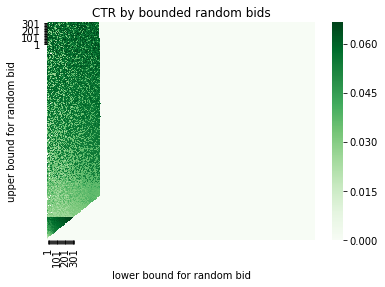

In [124]:
ax = sns.heatmap(CTRArray2D, linewidth=0, xticklabels=custRange, yticklabels=custRange[::-1], cmap="Greens") #, annot=True
ax.set(xlabel='lower bound for random bid', ylabel='upper bound for random bid', title="CTR by bounded random bids")
for label in ax.xaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[::10]:
    label.set_visible(True)
for label in ax.yaxis.get_ticklabels()[::1]:
    label.set_visible(False)
for label in ax.yaxis.get_ticklabels()[::10]:
    label.set_visible(True)
plt.show()

In [127]:

train_df['BidPayDifference'] = (train_df["bidprice"]-train_df["payprice"]).copy(True)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Bid price average for clicks: 273.2269938650307
Bid price average for non-clicks: 272.96185062662914 

Pay price average for clicks: 105.46402677077523
Pay price average for non-clicks: 78.1312566174376 

Pay price average: 78.15141623895867 

Bid-Pay-Difference average for clicks: 167.76296709425543
Bid-Pay-Difference average for non-clicks: 194.83059400919154 



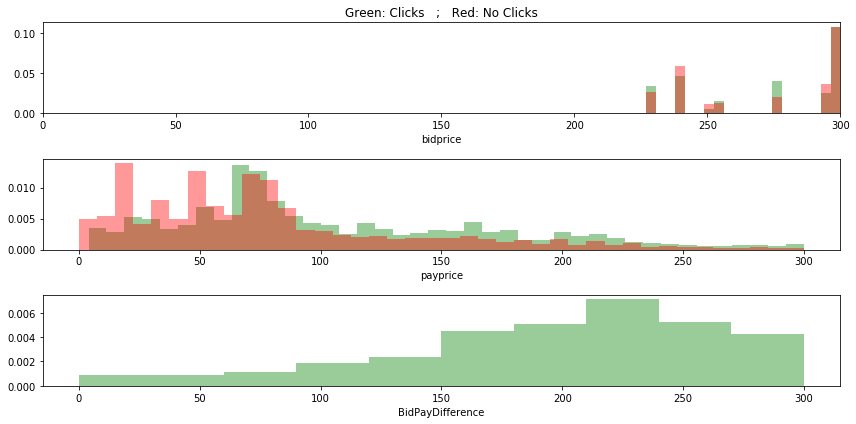

In [132]:
plt.figure(figsize = (12,6))

ax = plt.subplot(3,1,1)
sns.distplot(train_df.loc[train_df["click"] == 1, "bidprice"], bins = 20, kde = False, norm_hist = True, color = "green")
ax = plt.subplot(3,1,1)
sns.distplot(train_df.loc[train_df["click"] == 0, "bidprice"], bins = 20, kde = False, norm_hist = True, color = "red")
ax.set_xlim([0,300])
ax.set_title("Green: Clicks   ;   Red: No Clicks")

ax = plt.subplot(3,1,2)
sns.distplot(train_df.loc[train_df["click"] == 1, "payprice"], bins = 40, kde = False, norm_hist = True, color = "green")
ax = plt.subplot(3,1,2)
sns.distplot(train_df.loc[train_df["click"] == 0, "payprice"], bins = 40, kde = False, norm_hist = True, color = "red")

ax = plt.subplot(3,1,3)
sns.distplot(train_df["BidPayDifference"], bins = 10, kde = False, norm_hist = True, color = "green")
#ax = plt.subplot(3,1,3)
#sns.distplot(train.loc[train["click"] == 1, "BidPayDifference"], bins = 40, kde = False, norm_hist = True, color = "green")
#ax = plt.subplot(3,1,3)
#sns.distplot(train.loc[train["click"] == 0, "BidPayDifference"], bins = 40, kde = False, norm_hist = True, color = "red")

plt.tight_layout()

print("Bid price average for clicks:",train_df.loc[train_df["click"] == 1, "bidprice"].mean())
print("Bid price average for non-clicks:",train_df.loc[train_df["click"] == 0, "bidprice"].mean(),"\n")

print("Pay price average for clicks:",train.loc[train_df["click"] == 1, "payprice"].mean())
print("Pay price average for non-clicks:",train.loc[train_df["click"] == 0, "payprice"].mean(),"\n")
print("Pay price average:",train_df["payprice"].mean(),"\n")

print("Bid-Pay-Difference average for clicks:",train_df.loc[train_df["click"] == 1, "BidPayDifference"].mean())
print("Bid-Pay-Difference average for non-clicks:",train_df.loc[train_df["click"] == 0, "BidPayDifference"].mean(),"\n")